# 1 - Introdução
Os participantes do grupo são:
- Felipe Kleine - 5992514
- Gabriel Brandão - 10737182
- Guilherme Simões - 10758748
- Isaac Bergerman - 10337575
- Jiang Zhi - 9778706
- Ricardo Felix - 13797118

O link do Google Drive é https://drive.google.com/drive/folders/10eByLk4JH07dS5MFJV7H4jAr338w6pIV?usp=sharing, o link do Git é 
https://github.com/FelipeKleine/EP-MAC0417_5768-2022.

Nessa parte do EP exploramos a augmentação dos dados do dataset original.

# 2 - Explorando augmentação
Augmentação de dados é um conjunto de técnicas utilizadas para aumentar o número de dados realizando copias das imagens já existentes com pequenas modificações.


Existem alguns recursos interessantes, mas que não foram utilizados nesse EP:

https://github.com/aleju/imgaug

https://www.kaggle.com/parulpandey/overview-of-popular-image-augmentation-packages



Transformamos as imagens originais em níveis de cinza, usando a função rgb2gray da skimage, depois aplicamos as funções de data augmentation.

As funções de data augmentation que serão implementadas são:

- Soma de fundo com gradiente de níveis de cinza.
- Logaritmo da imagem
- Exponencial da imagem.
- Filtro da média implementado usando convolução.


O augmentedDataset terá 5X o tamanho do original.

In [8]:
import matplotlib.pyplot as plt

from skimage import data, io, img_as_float, exposure
from skimage.color import rgb2gray
from skimage.morphology import square
from skimage.filters import rank

import numpy as np
import os

from scipy import signal

import cv2 as cv
from glob import glob

from google.colab import drive, files

In [7]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/EP-MAC0417-MAC5768-2022/dataset')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Inicialmente fazemos o resize da image inicial para 256 x 256. 

In [12]:
def resize():
  path = 'original/'

  IMAGE_SIZE = (256, 256)

  classes = ["Caneca", "Controle", 
            "Garfo", "Garrafa", 
            "Headset", "Lapis", 
            "Livro", "Oculos", 
            "Perfume", "Sapato"]

  for c in classes:
      input_files = glob(path + c + '/*.jpg')
      
      for input_file in input_files:
          filename = input_file.replace('original', f'resized')
          dirs = filename[:filename.rfind('/')]
          if not os.path.exists(dirs):
              os.makedirs(dirs)
          if not os.path.exists(filename):
              img = cv.imread(input_file, cv.IMREAD_COLOR)
              resized = cv.resize(img, IMAGE_SIZE)
              io.imsave(filename, resized)
              print(filename)
if not os.path.exists(f"resized"):
  resize()

Essa parte cria uma classe de augmentação e tem um teste com a foto da lua.

In [ ]:
"""
  A classe Augment vai ser uma classe que vai fazer a augmentação da imagem
"""

class Augment:
    """
        A função gradient_background_sum faz a soma de fundo com grandiente de níveis de cinza 
    """
    def gradient_background_sum(self, image):
        lins, cols = image.shape             # Acha o tamanho da linha e o tamanho da coluna
        
        lin = np.linspace(0, 0.5, lins)      # Gera os valores entre 0 e 0.5 igualmente espaçado
        lin = np.reshape(lin, (lins, 1))     # Muda para de vetor uma matriz lins x 1

        col = np.linspace(0, 0.5, cols)      # Gera os valores entre 0 e 0.5 igualmente espaçado   
        col = np.reshape(col, (1,cols))      # Muda para de vetor uma matriz 1 x cols

        mask = lin + col                     # Quando soma uma matriz lins x 1 e soma com uma matriz 1 x cols ele cria a soma de cada par de valores e gera uma matriz lins x cols

        image = np.multiply(image, mask)     # Multiplicamos pela máscara.

        return image

    """
        A função logarithm faz o logaritmo da imagem
        
        Referências
        Manual oficial do scikit-image - https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_log_gamma.html
        Link onde mostra sobre img_as_float -  https://runebook.dev/es/docs/scikit_image/api/skimage.exposure
    """
    def logarithm(self, image):
        constant = 1.5                                                 # Constante
        image = img_as_float(image)                                    # Transforma para float e é necessário para a próxima função
        logarithmic_corrected = exposure.adjust_log(image, constant)   # Transforma a imagem para o logaritmo da imagem

        return logarithmic_corrected

    """
        A função exponential faz o exponencial da imagem
        
        Referências
        Manual oficial do scikit-image - https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_log_gamma.html
        Link onde mostra sobre img_as_float -  https://runebook.dev/es/docs/scikit_image/api/skimage.exposure
    """
    def exponential(self, image):
        constant = 1.5                                                 # Constante
        image = img_as_float(image)                                    # Transforma para float e é necessário para a próxima função
        gamma_corrected = exposure.adjust_gamma(image, constant)       # Transforma a imagem para a exponencial da imagem

        return gamma_corrected


    """
        A função mean filter faz o filtro da media
    """
    def mean_filter(self, image):
        """
          Esse é o filtro da média usando funções atuais.
        """
        footprint = square(10)
        image_final = rank.mean(image, footprint)

        """
          Esse é o filtro usando convolução, porém lento demais.
        """
        #size = 10
        #convolution = np.ones((size, size)) / size ** 2
        #image_final = signal.convolve2d(image, convolution, boundary='symm', mode='same')

        return image_final

    def run(self, image):
        return [self.gradient_background_sum(image), self.logarithm(image), self.exponential(image), self.mean_filter(image)]

def show(image):
    plt.figure()
    plt.imshow(image, cmap=plt.cm.gray) 
    plt.show() 

"""
   Essa parte testa cada uma das funções com a imagem da lua
"""
def test_moon():
    image = data.moon()
    image_gray = rgb2gray(image)

    show(image_gray) 
    # Chama a classe de augmentacao
    augment = Augment()
    # Primeira transformacao - Soma de gradiente no Fundo
    image_gradient_background_sum = augment.gradient_background_sum(image_gray)
    show(image_gradient_background_sum) 
    # Segunda transformacao - Logaritmo
    image_logarithm = augment.logarithm(image_gray)
    show(image_logarithm) 
    # Terceira transformacao - Exponencial
    image_exponential = augment.exponential(image_gray)
    show(image_exponential) 
    # Quarta transformacao - Filtro da mediana
    image_mean_filter = augment.mean_filter(image_gray)
    show(image_mean_filter)  

#test_moon()

In [ ]:
"""
Tentando fazer para todas as imagens
Temos o diretório principal que é a img e dentro deles temos os blobs para cada classe
"""
classes = ["Caneca", "Controle", "Garfo", "Garrafa", "Headset", "Lapis", "Livro", "Oculos", "Perfume", "Sapato"]

if not os.path.exists(f"augmented"):
    os.makedirs(f"augmented")


images = []
for object_class in classes:
  get_sample = True
  if not os.path.exists(f"augmented/{object_class}"):
    os.makedirs(f"augmented/{object_class}")

  directory = f"resized/{object_class}"
  if not os.path.exists(directory):
    continue
  for filename in os.listdir(directory):
    full_path = os.path.join(directory, filename)
    if os.path.isfile(full_path):


      
      broken = full_path.split('/')

      reconstruct_path = f"augmented/{broken[1]}/{broken[2]}"

      prefix_path = reconstruct_path[:-4]

      image = cv.imread(full_path)
      image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

      
      # Transforma para preto e branco.
      image_gray = rgb2gray(image)
      new_path = f"{prefix_path}_01.jpg"
      io.imsave(new_path, image_gray)
      if get_sample:
        images.append(image_gray)

      # Chama a classe de augmentacao
      augment = Augment()

      # Primeira transformacao - Soma de gradiente no Fundo
      image_gradient_background_sum = augment.gradient_background_sum(image_gray)
      new_path = f"{prefix_path}_02.jpg"
      io.imsave(new_path, image_gradient_background_sum)
      if get_sample:
        images.append(image_gradient_background_sum)

      # Segunda transformacao - Logaritmo
      image_logarithm = augment.logarithm(image_gray)
      new_path = f"{prefix_path}_03.jpg"
      io.imsave(new_path, image_logarithm)
      if get_sample:
        images.append(image_logarithm)

      # Terceira transformacao - Exponencial
      image_exponential = augment.exponential(image_gray)
      new_path = f"{prefix_path}_04.jpg"
      io.imsave(new_path, image_exponential)
      if get_sample:
        images.append(image_exponential)

      # Quarta transformacao - Filtro da mediana
      image_mean_filter = augment.mean_filter(image_gray)
      new_path = f"{prefix_path}_05.jpg"
      io.imsave(new_path, image_mean_filter)
      if get_sample:
        images.append(image_mean_filter)
      
      get_sample = False

A saída de streaming foi truncada nas últimas 5000 linhas.


# 3 - MNISTlike
Nessa parte, vamos apresentar os resultados de cada uma das classes, usando a visualização MNISTlike, como na primeira parte do EP.

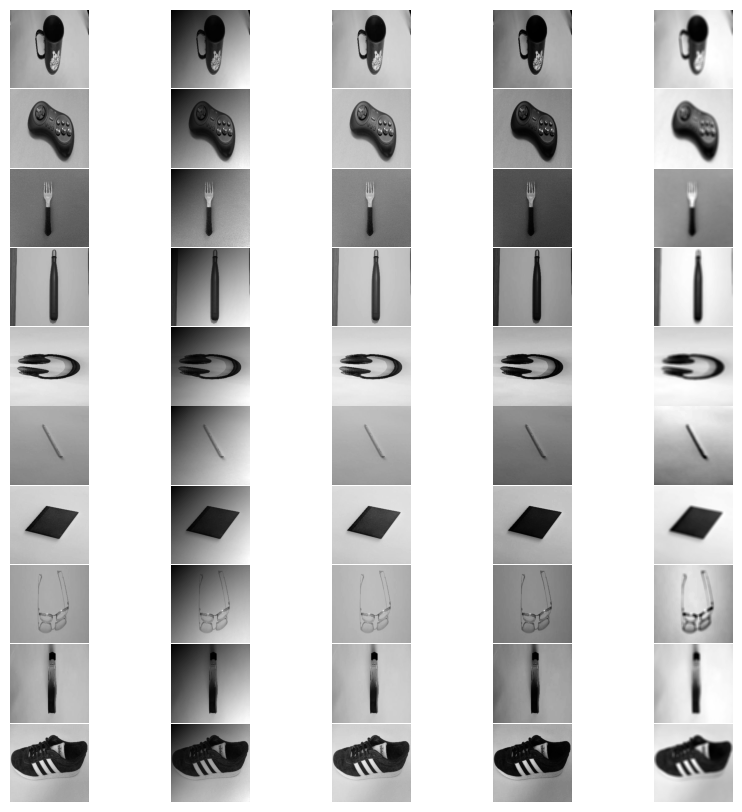

In [ ]:
## Adicionar código MNIST LIKE
"""
  Essa função plota as imagens no formato MNIST que foi descrito no enunciado.
"""
def plot_mnistlike(image, height, width):
  ## Essa parte são constantes que são usadas para definir o espaço entre as imagens
  left  = 0.01  # o lado esquerdo do subplot da figura
  right = 1.35   # o lado direito do subplot da figura
  bottom = 0.01   # o lado inferior do subplot da figura
  top = 1.99    # o lado superior do subplot da figura
  wspace = 0.01   # a quantidade de largura reservado para o espaço em branco entre subplots
  hspace = 0.01  # a quantidade de altura reservado para o espaço em branco entre subplots

  ## Essa parte começa a plotar as imagens
  cnt = 0
  fig = plt.figure(dpi=100)
  for i in range(height):
      for j in range(width):
          fig.add_subplot(height, width, cnt+1)                          # Cria um novo subplot na figura
          plt.imshow(image[cnt], cmap="gray")                                         # Mostra imagem
          plt.subplots_adjust(left, bottom, right, top, wspace, hspace)  # Faz ajustes de imagens
          plt.axis('off')                                                # Desativa os eixos
          cnt += 1


plot_mnistlike(images, 10, 5)
